In [1]:
import pydynverse as pdv

logger = pdv.logger
logger.setLevel("DEBUG")


  _____       _____                                     
 |  __ \     |  __ \                                    
 | |__) |   _| |  | |_   _ _ ____   _____ _ __ ___  ___ 
 |  ___/ | | | |  | | | | | '_ \ \ / / _ \ '__/ __|/ _ \
 | |   | |_| | |__| | |_| | | | \ V /  __/ |  \__ \  __/
 |_|    \__, |_____/ \__, |_| |_|\_/ \___|_|  |___/\___|
         __/ |        __/ |                             
        |___/        |___/         



In [2]:
# 1. 准备数据(wrap)
# 运行R脚本获得数据，为R对象
import rpy2.robjects as ro
from pydynverse.util import rpy2_read # 导入对应的装饰器， 实现数据自动转换
r_script = """
library(dyno)
data("fibroblast_reprogramming_treutlein")
fibroblast_reprogramming_treutlein
"""
fibroblast_reprogramming_treutlein = ro.r(r_script)

# 封装数据
dataset = pdv.wrap.wrap_expression(
    counts=fibroblast_reprogramming_treutlein["counts"],
    expression=fibroblast_reprogramming_treutlein["expression"]
)
logger.info(f"AnnData dataset:\n{dataset}")
logger.info("Dataset loading finished")

R[write to console]: 载入需要的程辑包：dynfeature

R[write to console]: 载入需要的程辑包：dynguidelines

R[write to console]: 载入需要的程辑包：dynmethods

R[write to console]: 载入需要的程辑包：dynplot

R[write to console]: 载入需要的程辑包：dynwrap



[2024年12月10日 21时13分04秒] DEBUG    Dataset created: {'id': '20241210_211304__data_wrapper__HjmFkSrgLC',        
                                       'cell_ids': ['1_iN1_C01', '1_iN1_C02', '1_iN1_C03', '1_iN1_C04',            
                                       '1_iN1_C05', '1_iN1_C07', '1_iN1_C08', '1_iN1_C09', '1_iN1_C10',            
                                       '1_iN1_C11', '1_iN1_C12', '1_iN1_C13', '1_iN1_C14', '1_iN1_C15',            
                                       '1_iN1_C16', '1_iN1_C17', '1_iN1_C19', '1_iN1_C20', '1_iN1_C21',            
                                       '1_iN1_C22', '1_iN1_C23', '1_iN1_C25', '1_iN1_C26', '1_iN1_C27',            
                                       '1_iN1_C29', '1_iN1_C30', '1_iN1_C31', '1_iN1_C33', '1_iN1_C34',            
                                       '1_iN1_C35', '1_iN1_C36', '1_iN1_C37', '1_iN1_C38', '1_iN1_C40',            
                                       '1_iN1_C41', '1_iN1_C42', '1_iN1_C43', 

In [3]:
# 2. 选择方法(method), 目前stuba和grandprix有点问题
methods_selected = pdv.methods.ti_paga(resolution=0.5)
logger.info(f"Methods {methods_selected} selecting finished")

[2024年12月10日 21时13分07秒] INFO     backend: container                                                          
                        DEBUG    Docker image(dynverse/ti_paga:v0.9.9.05) loaded                                   
[2024年12月10日 21时13分08秒] INFO     Methods {'method': {'id': 'paga', 'name': 'PAGA', 'tool_id': 'paga',        
                                       'source': 'tool', 'platform': 'Python', 'url':                              
                                       'https://github.com/theislab/graph_abstraction', 'authors': [{'given':      
                                       'Alexander', 'family': 'Wolf', 'email': 'alex.wolf@helmholtz-muenchen.de',  
                                       'github': 'falexwolf', 'ORCID': '0000-0002-8760-7838'}, {'given': 'Fabian', 
                                       'family': 'Theis', 'email': 'fabian.theis@helmholtz-muenchen.de', 'github': 
                                       'theislab'}]}, 'wrapper': {'type': 'branch_tr

In [4]:
# 3. 运行方法(wrap)
cluster_list = list(fibroblast_reprogramming_treutlein["grouping"])
dataset = pdv.wrap.add_prior_information(dataset, start_id="1_iN1_C01", groups_id=cluster_list) # 添加先验知识
model = pdv.wrap.infer_trajectory(dataset, methods_selected, parameters={"resolution": 1}) # 此处尝试修改参数
logger.info(f"Methods executing finished, model: {model}")

[2024年12月10日 21时13分09秒] DEBUG    Temp wd: /tmp/tmp4hl4_9rb                                                   


                        DEBUG    Save json successfully, path: /tmp/tmp4hl4_9rb/input.json                         
                        DEBUG    h52json script:                                                                   
                                 /home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydynverse/util/../rscript/docker_i
                                 nput_json2h5.R                                                                    
[2024年12月10日 21时13分10秒] DEBUG    CompletedProcess(args=['/home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydyn
                                       verse/util/../rscript/docker_input_json2h5.R', '--input_json_filename',     
                                       '/tmp/tmp4hl4_9rb/input.json', '--input_h5_filename',                       
                                       '/tmp/tmp4hl4_9rb/input.h5'], returncode=0, stdout='[1] "json2h5            
                                       successful!"\n', stderr='')            

[2024年12月10日 21时13分38秒] INFO     Coloring by grouping                                                        
                        DEBUG    selecting waypoints                                                               
[2024年12月10日 21时13分40秒] DEBUG    selecting waypoints shape is (130, 392), finished!                          
                        INFO     Result plotting finished                                                          


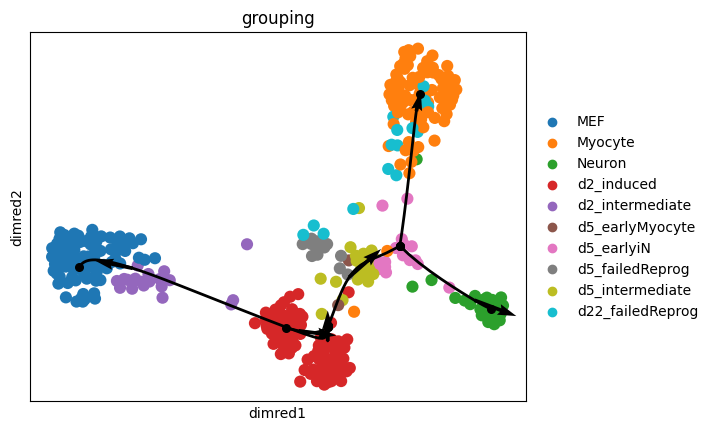

In [6]:
# 4. 绘制轨迹(dimred+plot)
# model = add_dimred(model, dimred_mds,  expression_source=dataset["expression"])  # 提取降维结果, 直接从docker输出容器获得
pdv.plot.plot_dimred(model, expression_source=dataset["expression"], grouping=cluster_list)
logger.info("Result plotting finished")